# Data Loading
Here we are loading the dataset and importing the required libraries for analysis.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/HR_Analytics.csv')

# Pre-Processing
So before we jump into ploting and analysis of the data, we are doing some what of preprocessing on our dataset.

In [ ]:
# Display the column names
print('Column names:', df.columns.tolist())

Column names: ['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
print(df['EducationField'].unique())

['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']


In [ ]:
#mapping of education field
mapping = {'Human Resources':1,'Life Sciences':2, 'Marketing':3,
           'Medical':4, 'Other':5, 'Technical Degree':6}
df['EF_code'] =df['EducationField'].map(mapping)

In [ ]:
int_data = df.select_dtypes(include=[int])
int_data.describe()

In [ ]:
#mapping of salary slab
df['SalarySlab'].unique()
mapping = {'Upto 5k':1, '5k-10k':2, '10k-15k':3, '15k+':4}
df['SS']=df['SalarySlab'].map(mapping)
df.head(4)

In [ ]:
columns_to_keep = ['Age','Gender' ,'AgeGroup','Education','EducationField','EF_code','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                   'JobSatisfaction', 'MonthlyIncome','MonthlyRate', 'PerformanceRating','SalarySlab',
                   'YearsAtCompany', 'YearsInCurrentRole','SS']
#Creating a Final Data set with the above mentioned cloumn names
fdata = df[columns_to_keep]

,Age,Gender,AgeGroup,Education,EducationField,EF_code,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,PerformanceRating,SalarySlab,YearsAtCompany,YearsInCurrentRole,SS
0,18,Male,18-25,3,Life Sciences,2,3,3,1,3,1420,25233,3,Upto 5k,0,0,1
1,18,Female,18-25,3,Medical,4,4,2,1,3,1200,9724,3,Upto 5k,0,0,1
2,18,Male,18-25,3,Marketing,3,2,3,1,2,1878,8059,3,Upto 5k,0,0,1
3,18,Male,18-25,2,Life Sciences,2,2,3,1,4,1051,13493,3,Upto 5k,0,0,1
4,18,Male,18-25,1,Medical,4,3,3,1,3,1904,13556,3,Upto 5k,0,0,1


# Plotting
Here we have done the analysis and tried to find the correlation among the columns which are present in the data set.
Here basically we have the correlation of our problem statement i.e., education level, job satisfaction and salary structure


In [ ]:
#education level, job satisfaction and salary structure correlation
cor = fdata[['Education','SS','JobSatisfaction']].corr()
print(cor)

                 Education        SS  JobSatisfaction
Education         1.000000  0.104711        -0.012740
SS                0.104711  1.000000         0.000208
JobSatisfaction  -0.012740  0.000208         1.000000


<ipython-input-79-53ad1c90230c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SalarySlab',y='JobSatisfaction',hue='Education', data=fdata, ci=None, palette='rainbow' ,ax=axs[0,0])
<ipython-input-79-53ad1c90230c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Education',y='JobSatisfaction', data=fdata, ci=None, palette='flare' ,ax=axs[0,1])
<ipython-input-79-53ad1c90230c>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Education',y='JobSatisfaction', data=fdata, ci=None, palette='flare' ,ax=axs[0,1])
<ipython-input-79-53ad1c90230c>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='SalarySlab',y='JobSatisfaction', data=fdata, color='red' ,ci=None, ax=axs[1,0])
<ipython-input-79-53ad1c90230c>:16: FutureWarning: 

The `ci` parameter is deprecate

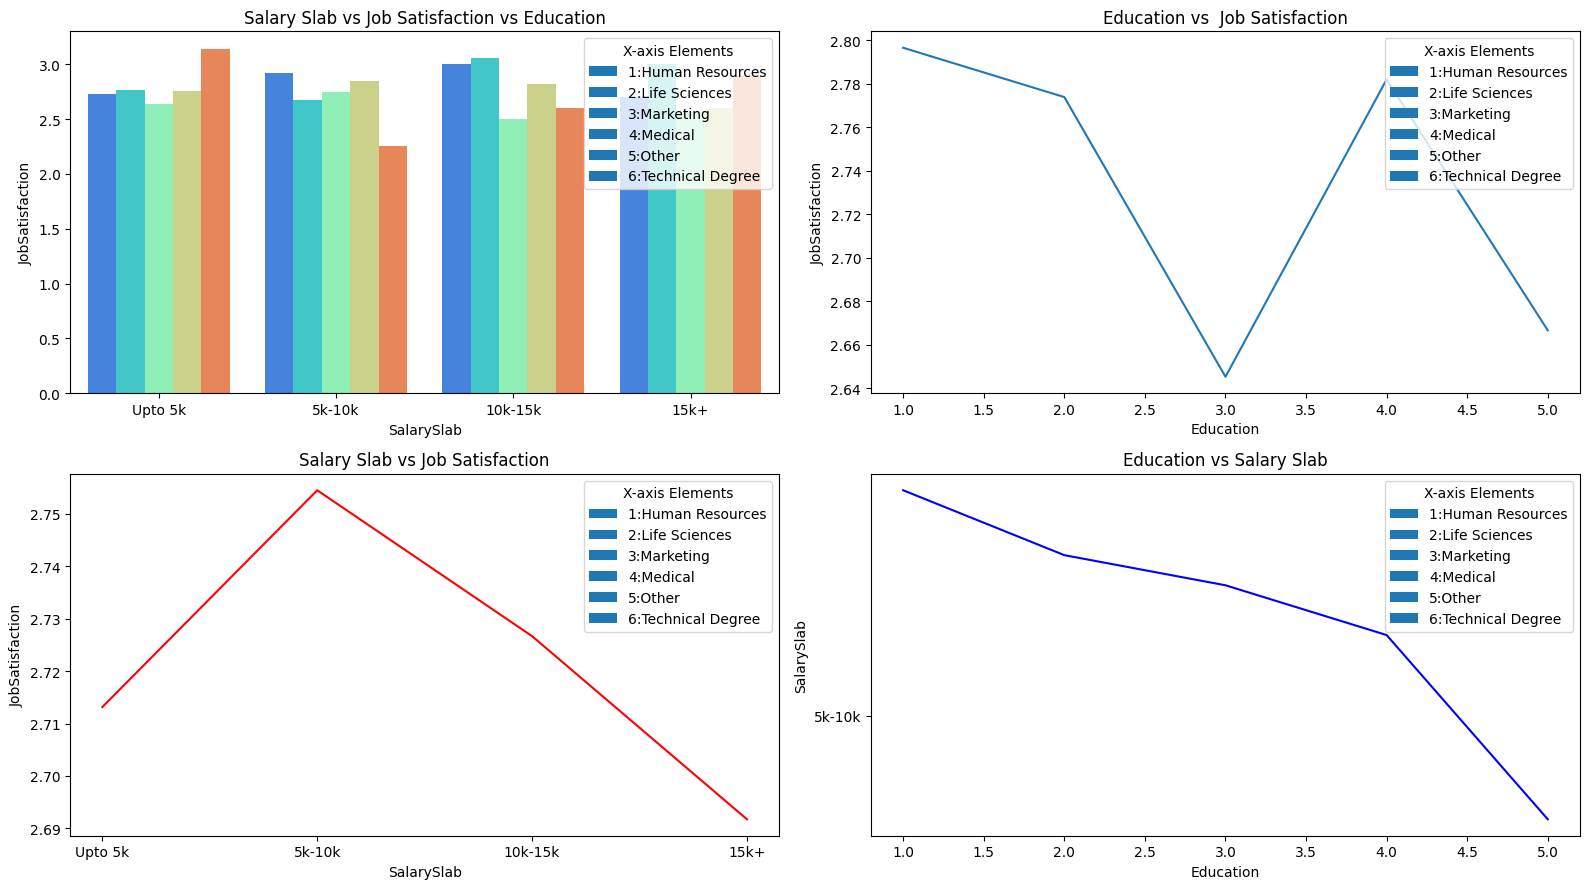

In [ ]:
#education level, job satisfaction and salary structure
fig, axs= plt.subplots(2,2, figsize=(16,9))

sns.barplot(x='SalarySlab',y='JobSatisfaction',hue='Education', data=fdata, ci=None, palette='rainbow' ,ax=axs[0,0])
axs[0,0].set_title(label="Salary Slab vs Job Satisfaction vs Education")
axs[0,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='Education',y='JobSatisfaction', data=fdata, ci=None, palette='flare' ,ax=axs[0,1])
axs[0,1].set_title(label= "Education vs  Job Satisfaction")
axs[0,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='SalarySlab',y='JobSatisfaction', data=fdata, color='red' ,ci=None, ax=axs[1,0])
axs[1,0].set_title(label="Salary Slab vs Job Satisfaction")
axs[1,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='Education',y='SalarySlab', data=fdata, color='blue',ci=None, ax=axs[1,1])
axs[1,1].set_title(label= "Education vs Salary Slab")
axs[1,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

plt.tight_layout()
plt.savefig("PIC_1")
plt.show()




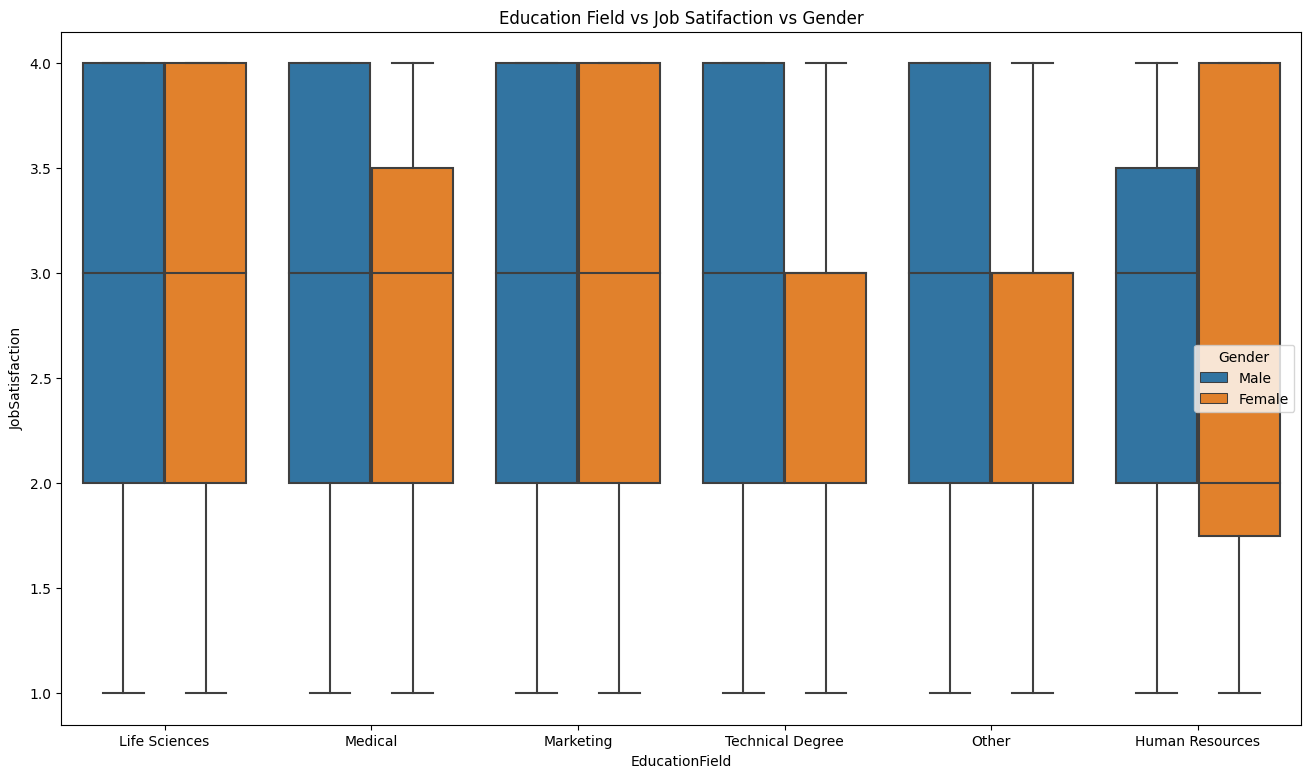

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x='EducationField', y='JobSatisfaction',hue='Gender', data=df)
plt.title(label='Education Field vs Job Satifaction vs Gender')
plt.savefig("PIC_2")
plt.show()

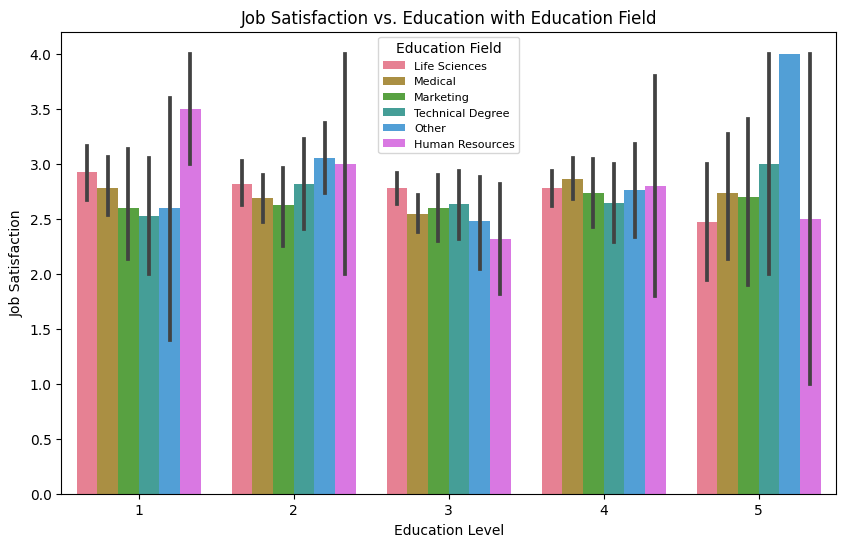

In [ ]:
# Set the color palette for different education fields
palette = sns.color_palette("husl", len(df['EducationField'].unique()))

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Education', y='JobSatisfaction', hue='EducationField', data=df, palette=palette)

# Set plot labels and title
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction')
plt.title('Job Satisfaction vs. Education with Education Field')

# Adjust legend size and position
ax.legend(title='Education Field', loc='upper center', bbox_to_anchor=(.5, 1), ncol=1, fontsize=8)
plt.savefig("PIC_4")

# Show the plot
plt.show()

<ipython-input-64-2fb4de5e139e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= fdata.corr()


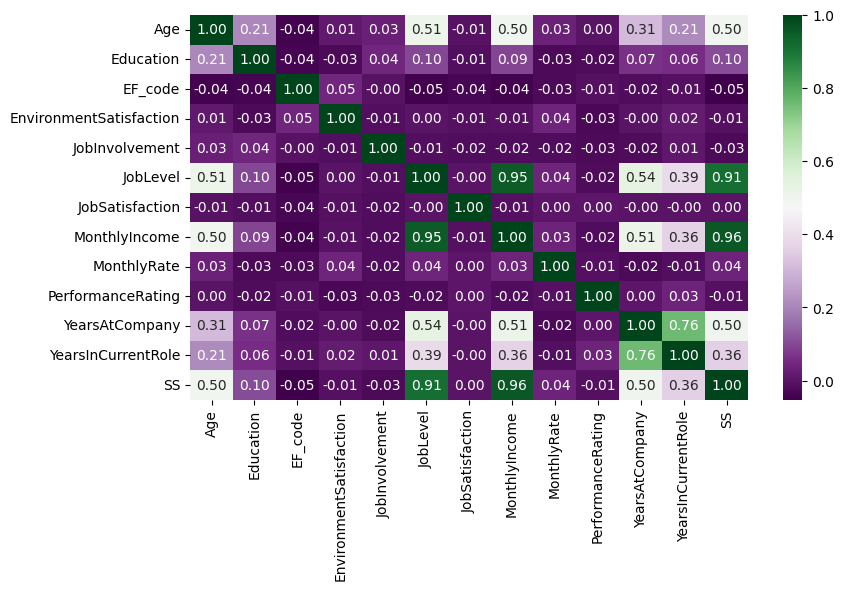

In [ ]:
# Plot the correlation matrix as a heatmap
corr= fdata.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='PRGn')
plt.savefig('corr.png')
plt.show()

#Analysis 1
Here the columns(Age and Job Level,Age and Monthly Income, Age and Years At Company,Age and Years In Current Role) are positvely correlated with each other and it is shown in the plots.




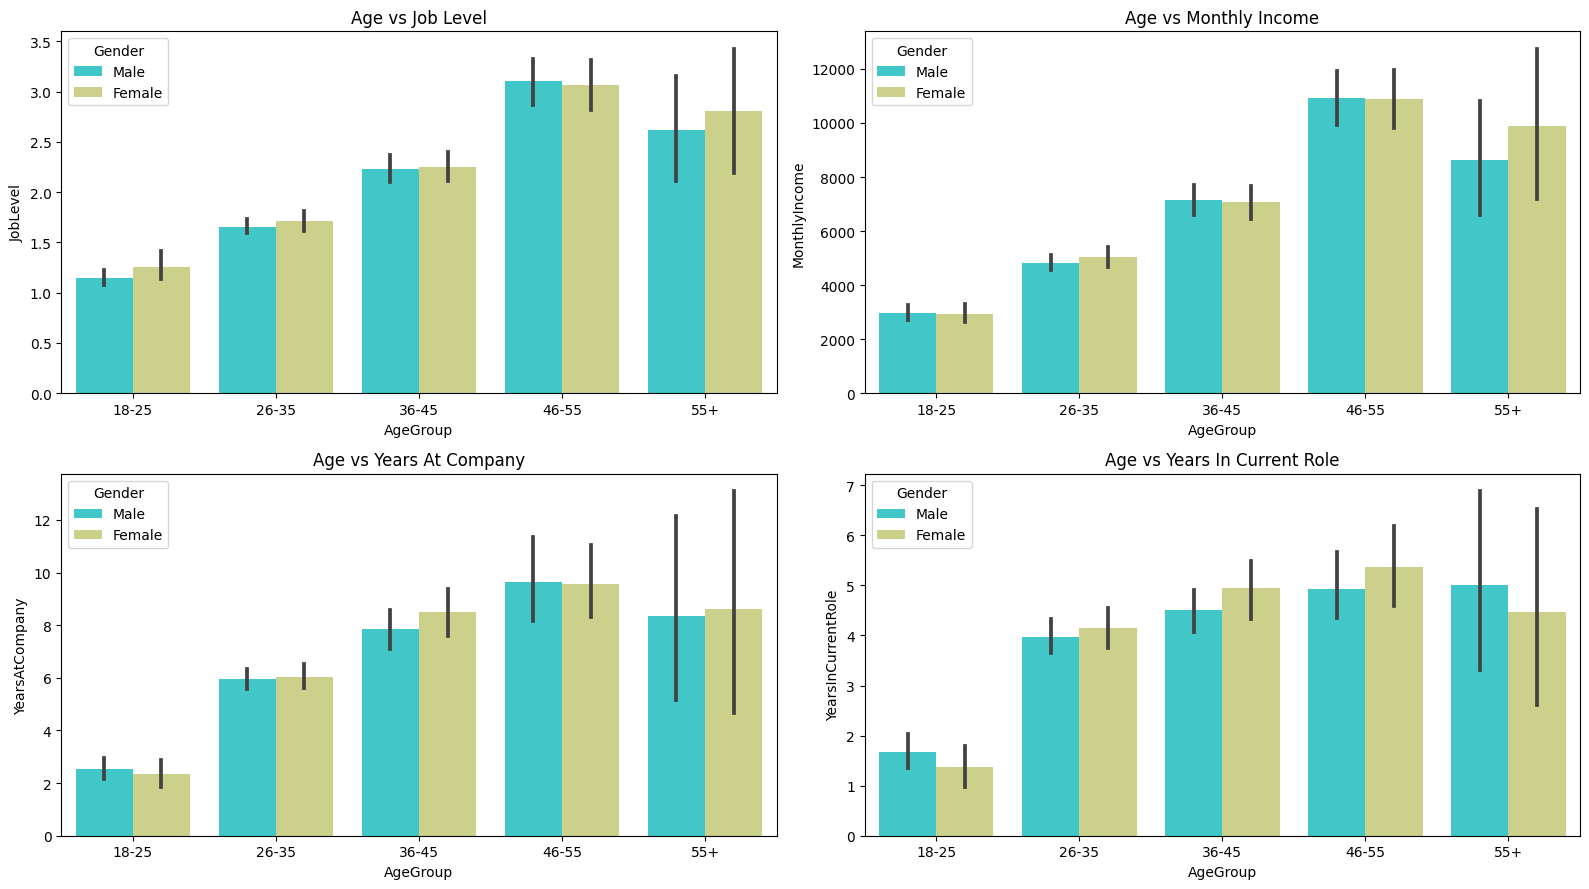

In [ ]:
#Age and JobLevel & Age and MonthlyIncome ,Age and YearsAtCompany & Age and YearsInCurrentRole

fig, axs= plt.subplots(2,2, figsize=(16,9))
sns.barplot(x='AgeGroup',y='JobLevel', hue='Gender',palette='rainbow', data=fdata, ax=axs[0,0])
axs[0,0].set_title(label="Age vs Job Level")
sns.barplot(x='AgeGroup',y='MonthlyIncome',hue='Gender',palette='rainbow', data=fdata, ax=axs[0,1])
axs[0,1].set_title(label= "Age vs Monthly Income")
sns.barplot(x='AgeGroup',y='YearsAtCompany',hue='Gender',palette='rainbow', data=fdata,ax=axs[1,0])
axs[1,0].set_title(label="Age vs Years At Company")
sns.barplot(x='AgeGroup',y='YearsInCurrentRole',hue='Gender',palette='rainbow', data=fdata, ax=axs[1,1])
axs[1,1].set_title(label= "Age vs Years In Current Role")

plt.tight_layout()
plt.savefig("PIC_5")

plt.show()

<ipython-input-66-497840b83b82>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobLevel',y='MonthlyIncome', data=fdata, hue='AgeGroup',ci=None, palette='rainbow' )


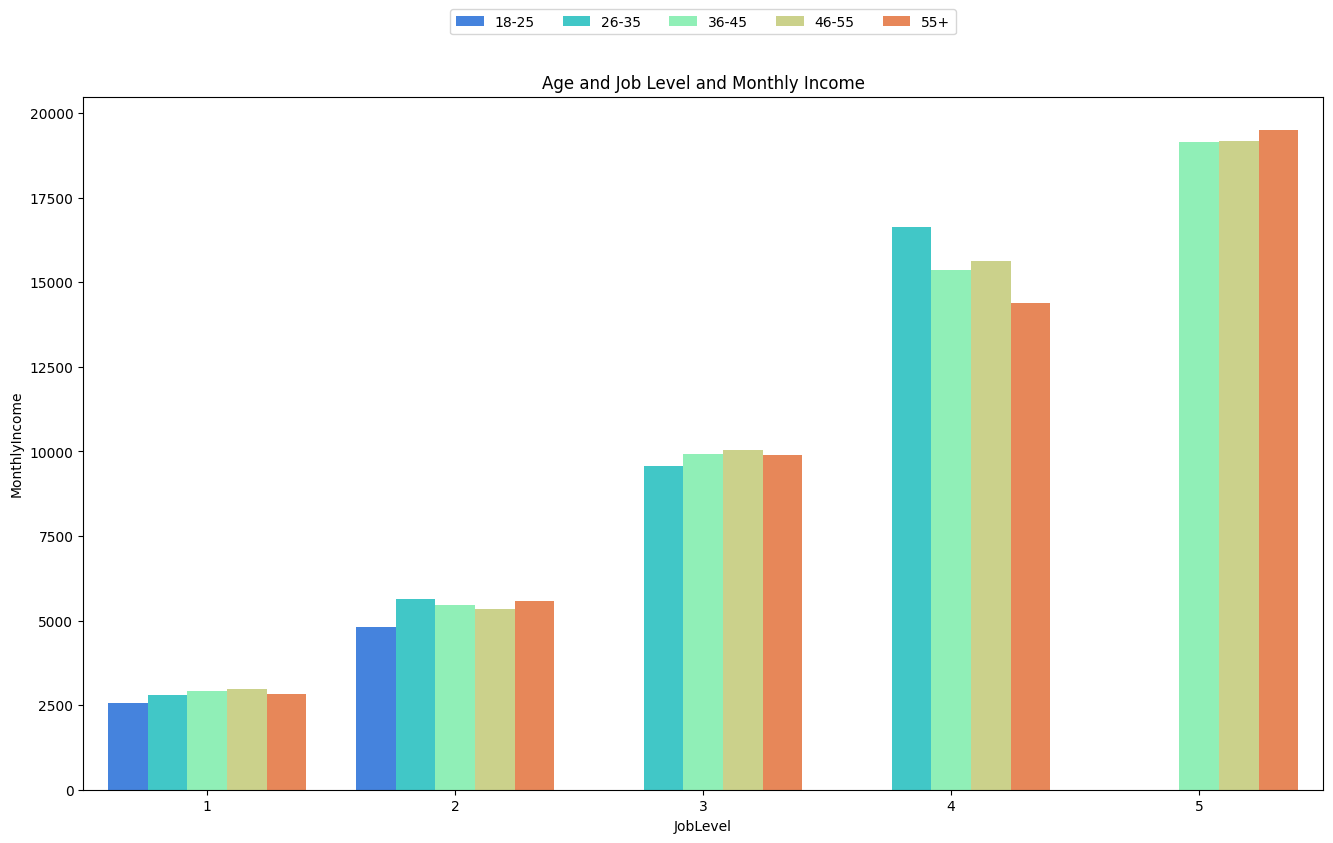

In [ ]:
#Age and JobLevel and Monthly Income
plt.figure(figsize=(16,9))
sns.barplot(x='JobLevel',y='MonthlyIncome', data=fdata, hue='AgeGroup',ci=None, palette='rainbow' )
plt.title(label='Age and Job Level and Monthly Income')
plt.legend(bbox_to_anchor=(0.5, 1.09), loc='lower center', borderaxespad=0., ncol=7)
plt.savefig("PIC_6")
plt.show()

<ipython-input-67-89c70601f242>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, hue='AgeGroup',ci=None, palette='rainbow' )


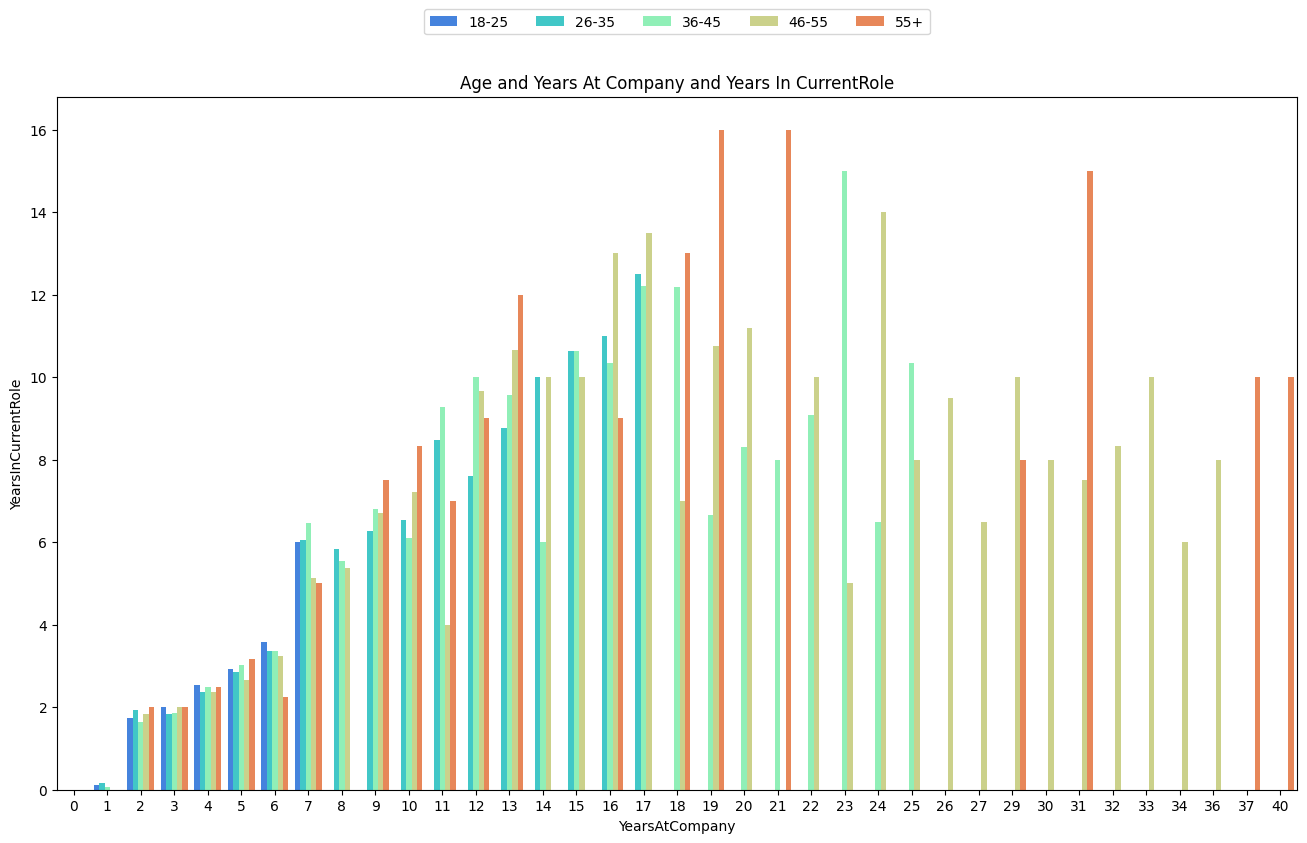

In [ ]:
#Age and YearsAtCompany and YearsInCurrentRole
plt.figure(figsize=(16,9))
sns.barplot(x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, hue='AgeGroup',ci=None, palette='rainbow' )
plt.title(label='Age and Years At Company and Years In CurrentRole')
plt.legend(bbox_to_anchor=(0.5, 1.09), loc='lower center', borderaxespad=0., ncol=7)
plt.savefig("PIC_7")

plt.show()

#Analysis 2
Here the following columns(JobLevel and MonthlyIncome, JobLevel and YearsAtCompany,JobLevel and YearsInCurrentRole)are positvely correlated with each other and which is also visible in the plots.


<ipython-input-68-a39efb20af64>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobLevel',y='MonthlyIncome', data=fdata,ci=None, palette='flare' )


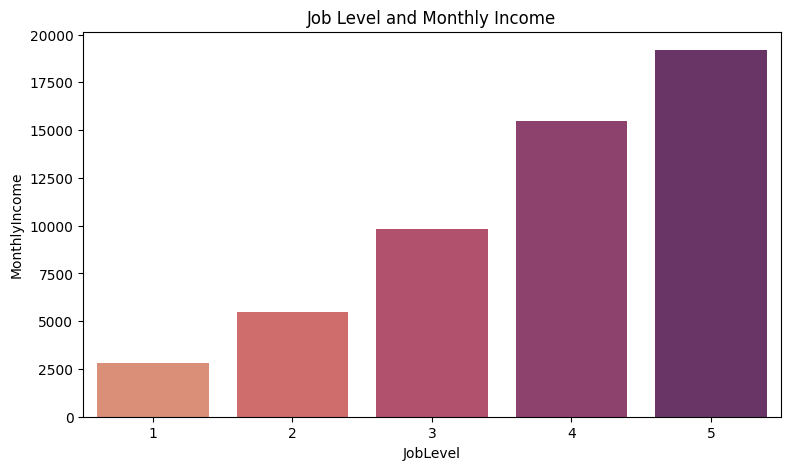

In [ ]:
#JobLevel and MonthlyIncome

plt.figure(figsize=(9,5))
sns.barplot(x='JobLevel',y='MonthlyIncome', data=fdata,ci=None, palette='flare' )
plt.title(label='Job Level and Monthly Income')
plt.savefig("PIC_8")

plt.show()

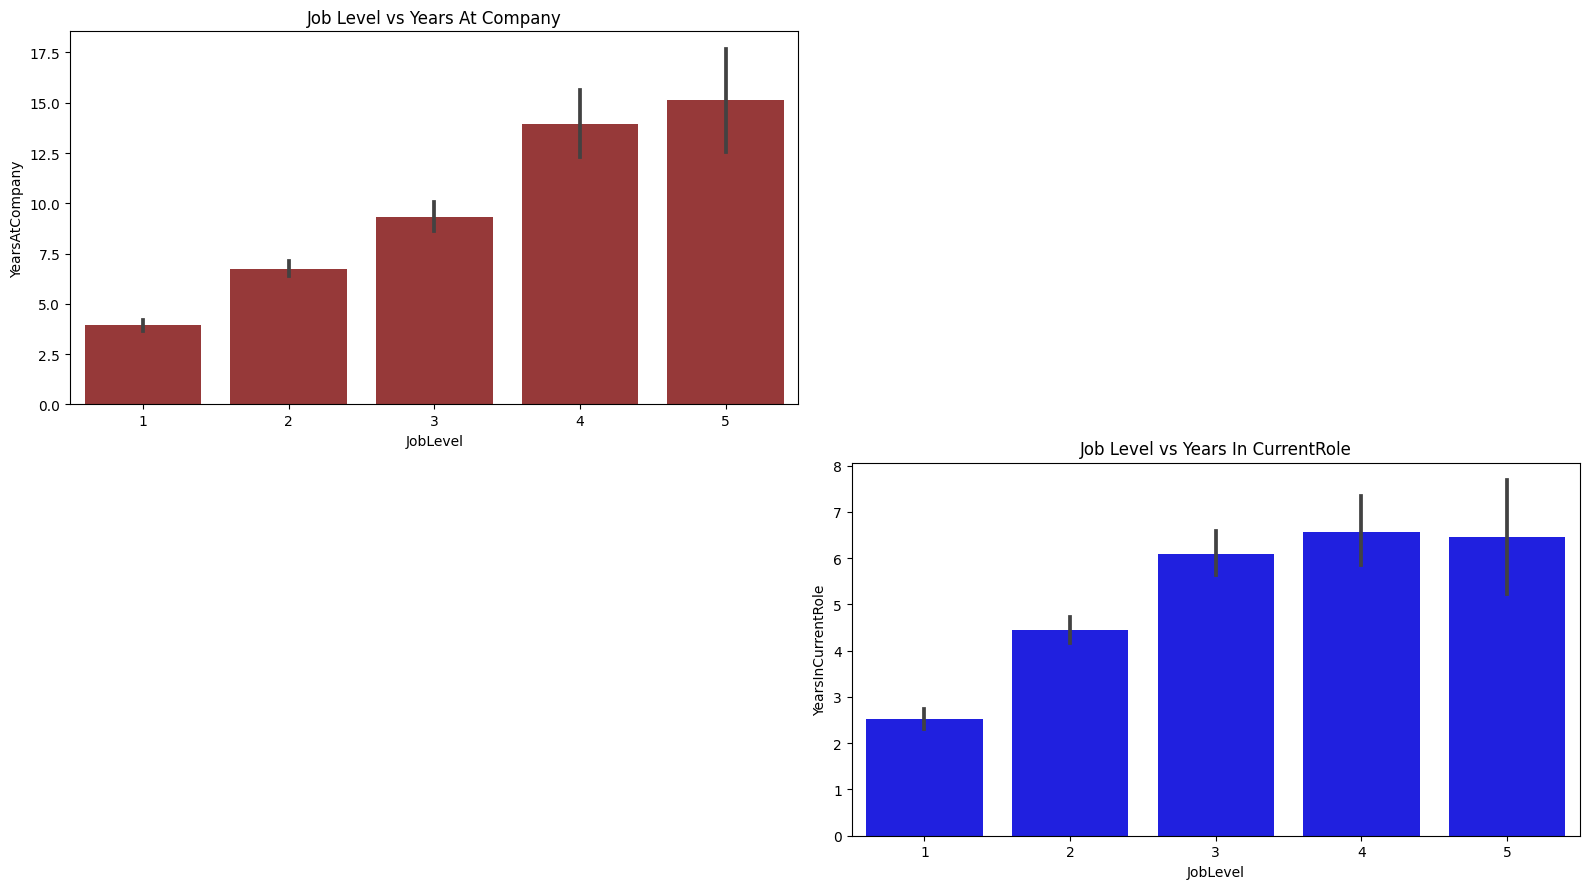

In [ ]:
#JobLevel and YearsAtCompany & JobLevel and YearsInCurrentRole
fig, axs= plt.subplots(2,2, figsize=(16,9))
sns.barplot(x='JobLevel',y='YearsAtCompany', data=fdata, color='brown' ,ax=axs[0,0])
axs[0,0].set_title(label="Job Level vs Years At Company")
sns.barplot(x='JobLevel',y='YearsInCurrentRole', data=fdata, color='blue', ax=axs[1,1])
axs[1,1].set_title(label= "Job Level vs Years In CurrentRole")
axs[0,1].remove()
axs[1,0].remove()
plt.tight_layout()
plt.savefig("PIC_9")

plt.show()

<ipython-input-70-1fbf52a03c6c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, hue='JobLevel',ci=None, palette='flare' )


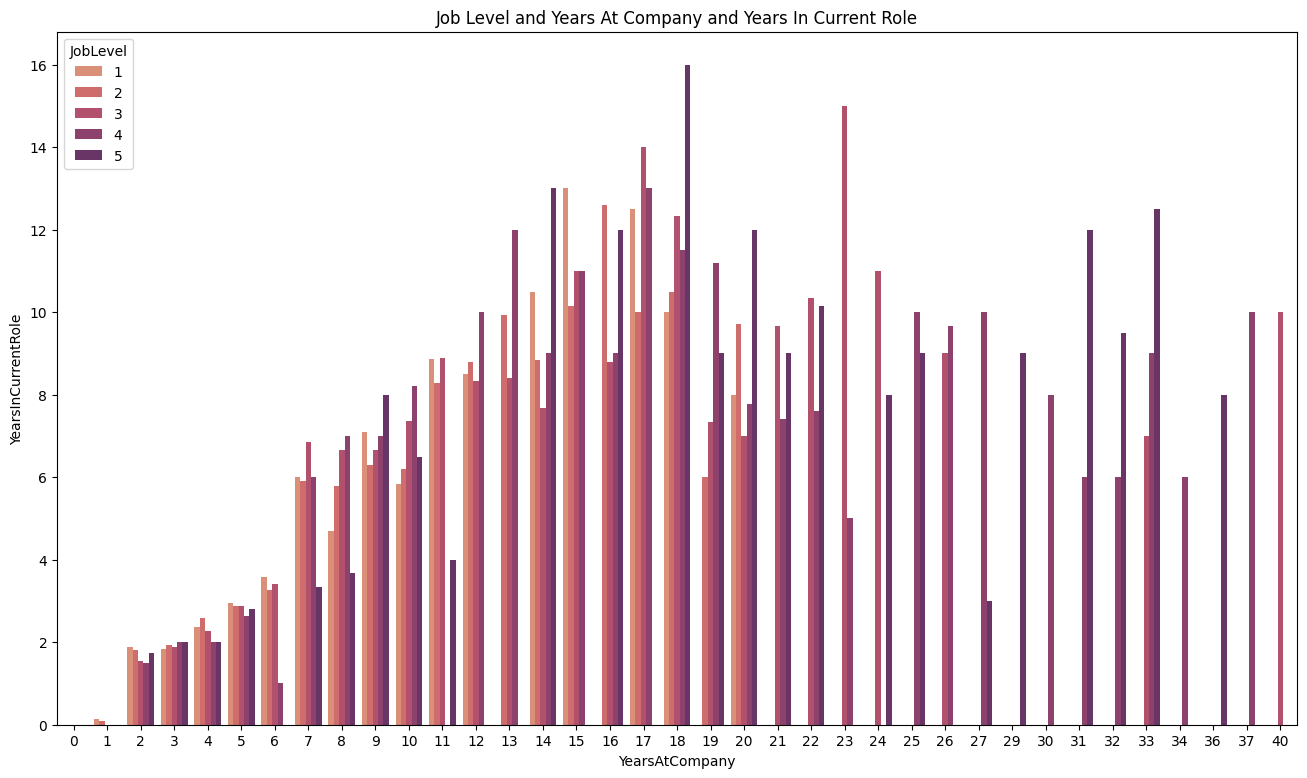

In [ ]:
#JobLevel and YearsAtCompany and YearsInCurrentRole
plt.figure(figsize=(16,9))
sns.barplot(x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, hue='JobLevel',ci=None, palette='flare' )
plt.title(label='Job Level and Years At Company and Years In Current Role')
plt.savefig("PIC_10")

plt.show()

#Analysis 3
Here the columns (MonthlyIncome and YearsAtCompany, MonthlyIncome and YearsInCurrentRole, YearsAtCompany and YearsInCurrentRole) are also correlated with each other and which is portraited in the plots.

<ipython-input-71-34d6983aa39c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsInCurrentRole', y='MonthlyIncome',hue='Gender', data=fdata, ci=None,palette='husl', ax=axs[0,0])
<ipython-input-71-34d6983aa39c>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsAtCompany', y='MonthlyIncome',hue='Gender', data=fdata, ci=None,palette='husl', ax=axs[1,0])


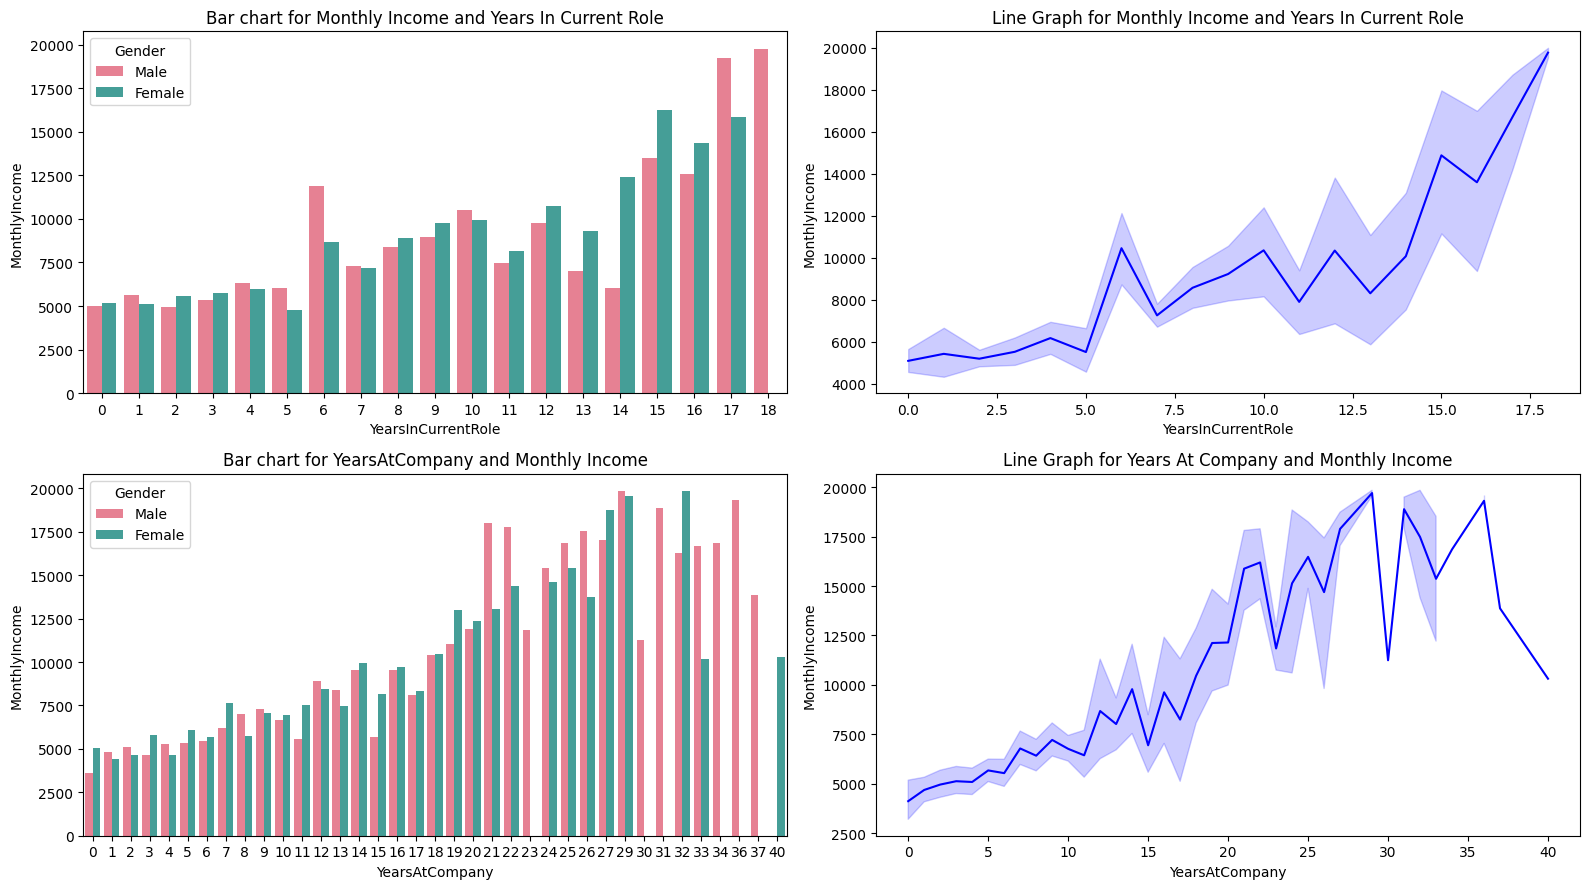

In [ ]:
#MonthlyIncome and YearsInCurrentRole

fig, axs= plt.subplots(2,2, figsize=(16,9))
sns.barplot(x='YearsInCurrentRole', y='MonthlyIncome',hue='Gender', data=fdata, ci=None,palette='husl', ax=axs[0,0])
axs[0,0].set_title(label="Bar chart for Monthly Income and Years In Current Role")

sns.lineplot(x='YearsInCurrentRole', y='MonthlyIncome', data=fdata, color='blue', ax=axs[0,1])
axs[0,1].set_title(label= "Line Graph for Monthly Income and Years In Current Role")

sns.barplot(x='YearsAtCompany', y='MonthlyIncome',hue='Gender', data=fdata, ci=None,palette='husl', ax=axs[1,0])
axs[1,0].set_title(label="Bar chart for YearsAtCompany and Monthly Income")

sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=fdata, color='blue', ax=axs[1,1])
axs[1,1].set_title(label= "Line Graph for Years At Company and Monthly Income")

plt.tight_layout()
plt.savefig("PIC_11")

plt.show()


<ipython-input-72-edd1b06c3270>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsAtCompany',y='MonthlyIncome', data=fdata, hue='YearsInCurrentRole',ci=None, palette='flare' )


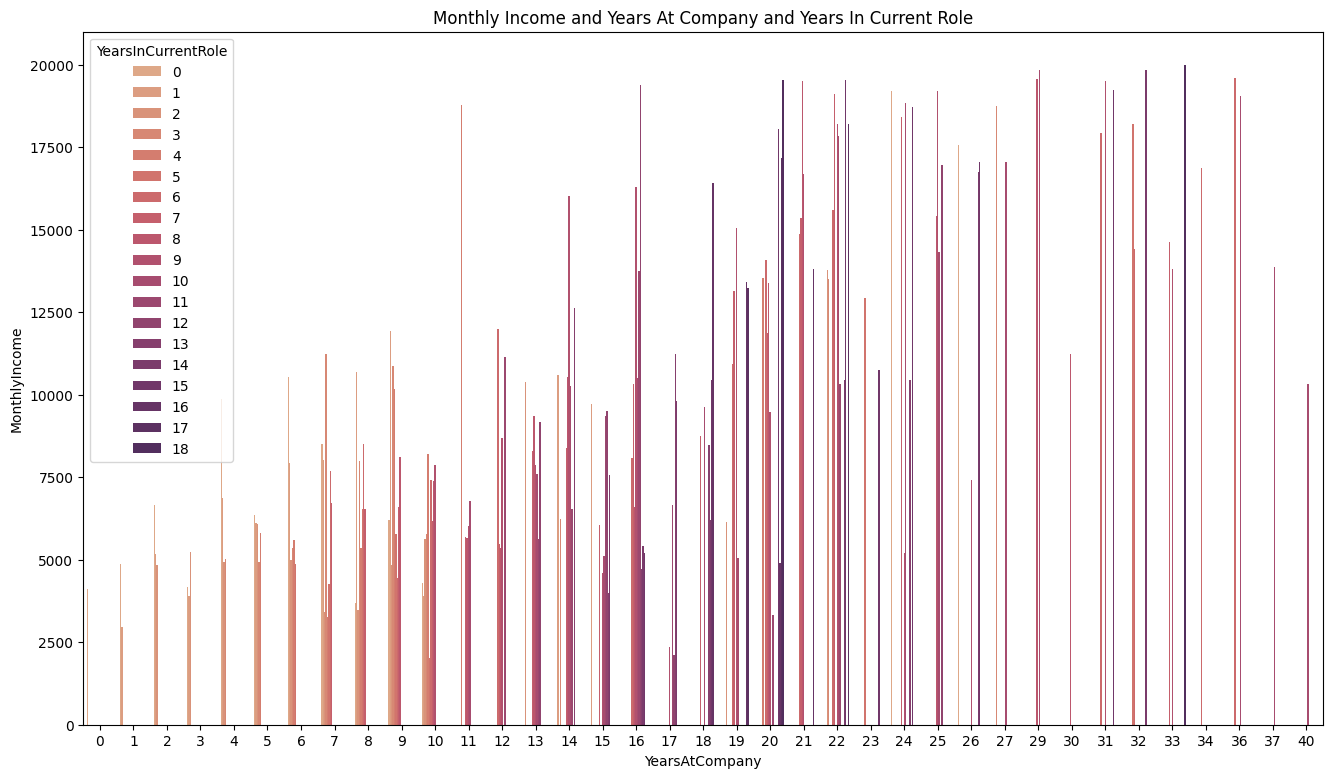

In [ ]:
#MonthlyIncome and YearsAtCompany and YearsInCurrentRole
plt.figure(figsize=(16,9))
sns.barplot(x='YearsAtCompany',y='MonthlyIncome', data=fdata, hue='YearsInCurrentRole',ci=None, palette='flare' )
plt.title(label='Monthly Income and Years At Company and Years In Current Role')
plt.savefig("PIC_12")
plt.show()

<ipython-input-73-4f3be4261b90>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, ci=None,palette='husl', ax=axs[0,0])


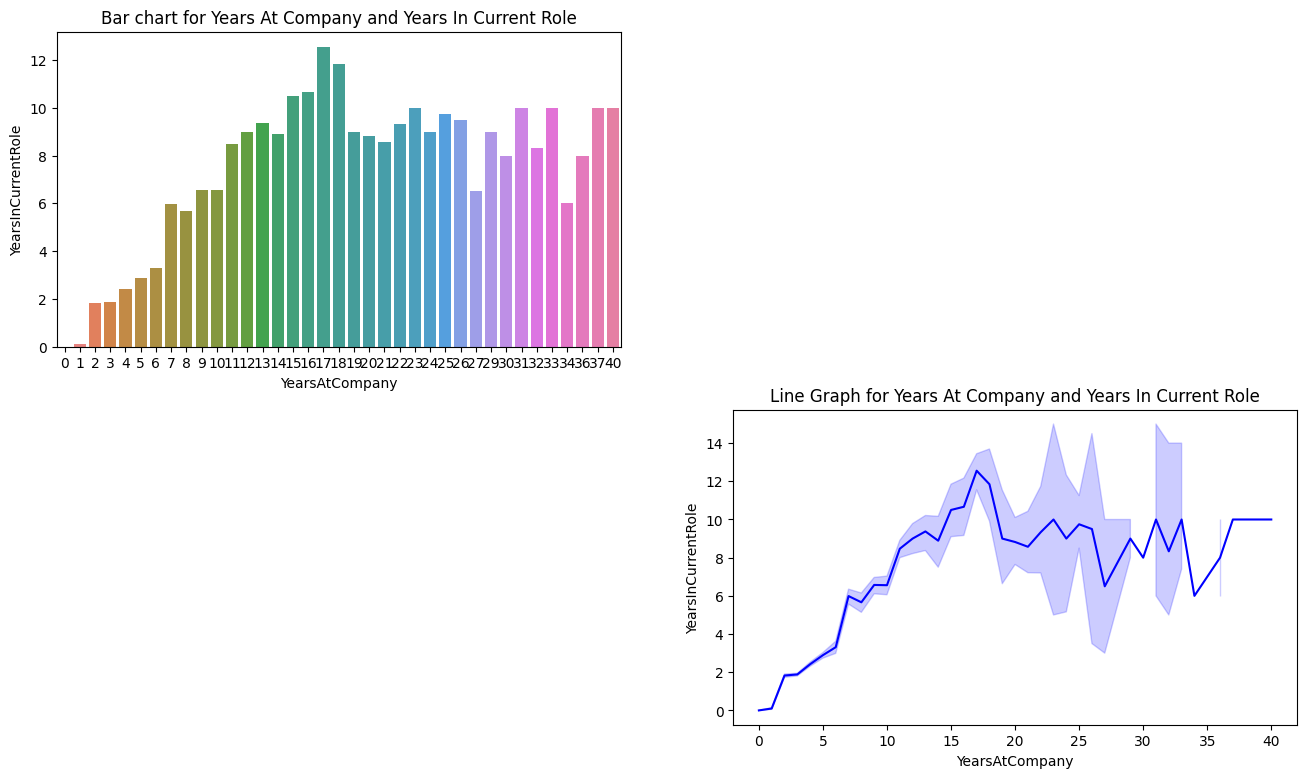

In [ ]:

fig, axs= plt.subplots(2,2, figsize=(16,9))
sns.barplot( x='YearsAtCompany',y='YearsInCurrentRole', data=fdata, ci=None,palette='husl', ax=axs[0,0])
axs[0,0].set_title(label="Bar chart for Years At Company and Years In Current Role")
axs[1,0].remove()
axs[0,1].remove()
sns.lineplot(x='YearsAtCompany', y='YearsInCurrentRole', data=fdata, color='blue', ax=axs[1,1])
axs[1,1].set_title(label= "Line Graph for Years At Company and Years In Current Role")
plt.savefig("PIC_13")
plt.show()

# Analysis 4
Trying to gain some insights Age and Education Field

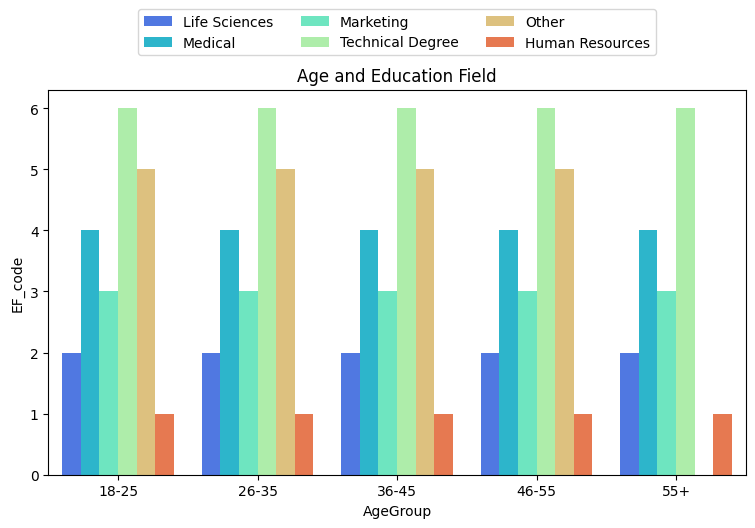

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x='AgeGroup',y='EF_code', data=fdata, hue='EducationField', errorbar=None, palette='rainbow' )
plt.title(label='Age and Education Field')
plt.legend(bbox_to_anchor=(0.5, 1.09), loc='lower center', borderaxespad=0., ncol=3)
plt.savefig("PIC_14")

plt.show()

# Analysis 5
Here in these columns(Education and EF_code, Education and EnvironmentSatisfaction,Education and JobSatisfaction,Education and MonthlyRate,Education and PerformanceRating # EF_code and JobInvolvement, EF_code and JobLevel,EF_code and MonthlyIncome,EF_code and YearsAtCompany,EF_code and YearsInCurrentRole) are also correlated with each other but these are negatively correlated.


<ipython-input-75-5b3ff4cc5342>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Education',y='EnvironmentSatisfaction', data=fdata, ci=None, color='red' ,ax=axs[0,0])
<ipython-input-75-5b3ff4cc5342>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Education',y='JobSatisfaction', data=fdata, color='red',ci=None, ax=axs[0,1])
<ipython-input-75-5b3ff4cc5342>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Education',y='MonthlyRate', data=fdata, color='red' ,ci=None, ax=axs[1,0])
<ipython-input-75-5b3ff4cc5342>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Education',y='PerformanceRating', data=fdata, color='blue',ci=None, ax=axs[1,1])


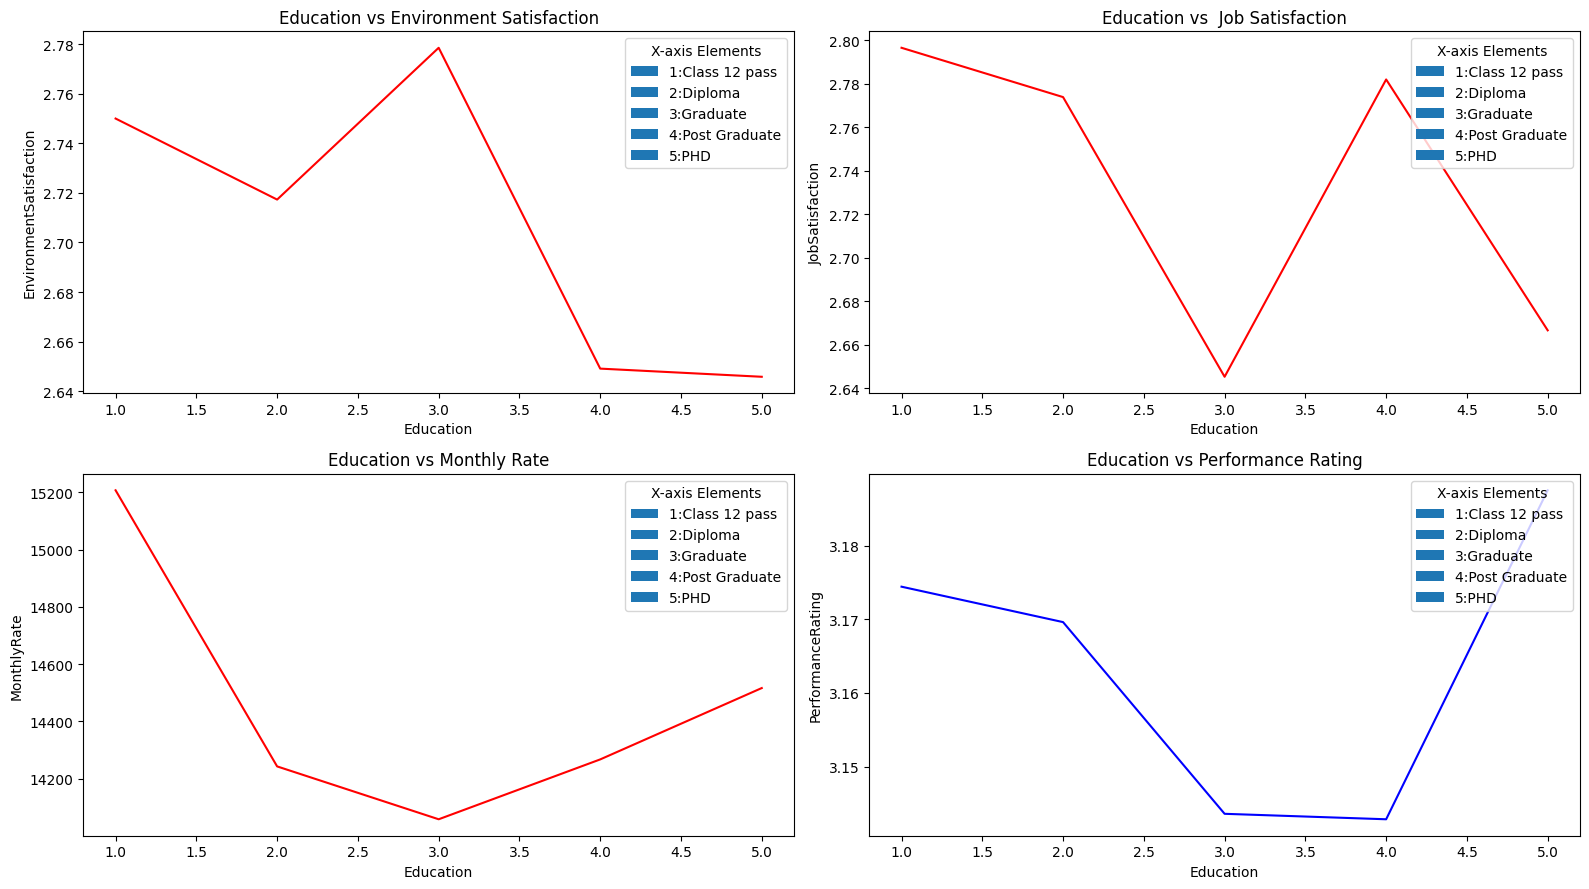

In [ ]:
fig, axs= plt.subplots(2,2, figsize=(16,9))
legend_elements = [mpatches.Patch(label='1:Class 12 pass'),
                   mpatches.Patch(label='2:Diploma'),
                   mpatches.Patch(label='3:Graduate'),
                   mpatches.Patch(label='4:Post Graduate'),
                   mpatches.Patch(label='5:PHD')]


sns.lineplot(x='Education',y='EnvironmentSatisfaction', data=fdata, ci=None, color='red' ,ax=axs[0,0])
axs[0,0].set_title(label="Education vs Environment Satisfaction")
axs[0,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='Education',y='JobSatisfaction', data=fdata, color='red',ci=None, ax=axs[0,1])
axs[0,1].set_title(label= "Education vs  Job Satisfaction")
axs[0,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='Education',y='MonthlyRate', data=fdata, color='red' ,ci=None, ax=axs[1,0])
axs[1,0].set_title(label="Education vs Monthly Rate")
axs[1,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='Education',y='PerformanceRating', data=fdata, color='blue',ci=None, ax=axs[1,1])
axs[1,1].set_title(label= "Education vs Performance Rating")
axs[1,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

plt.tight_layout()
plt.savefig("PIC_15")

plt.show()

<ipython-input-76-16651dfeb574>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='EF_code',y='JobInvolvement', data=fdata, ci=None, color='red' ,ax=axs[0,0])
<ipython-input-76-16651dfeb574>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='EF_code',y='JobLevel', data=fdata, color='red',ci=None, ax=axs[0,1])
<ipython-input-76-16651dfeb574>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='EF_code',y='YearsAtCompany', data=fdata, color='red' ,ci=None, ax=axs[1,0])
<ipython-input-76-16651dfeb574>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='EF_code',y='YearsInCurrentRole', data=fdata, color='blue',ci=None, ax=axs[1,1])


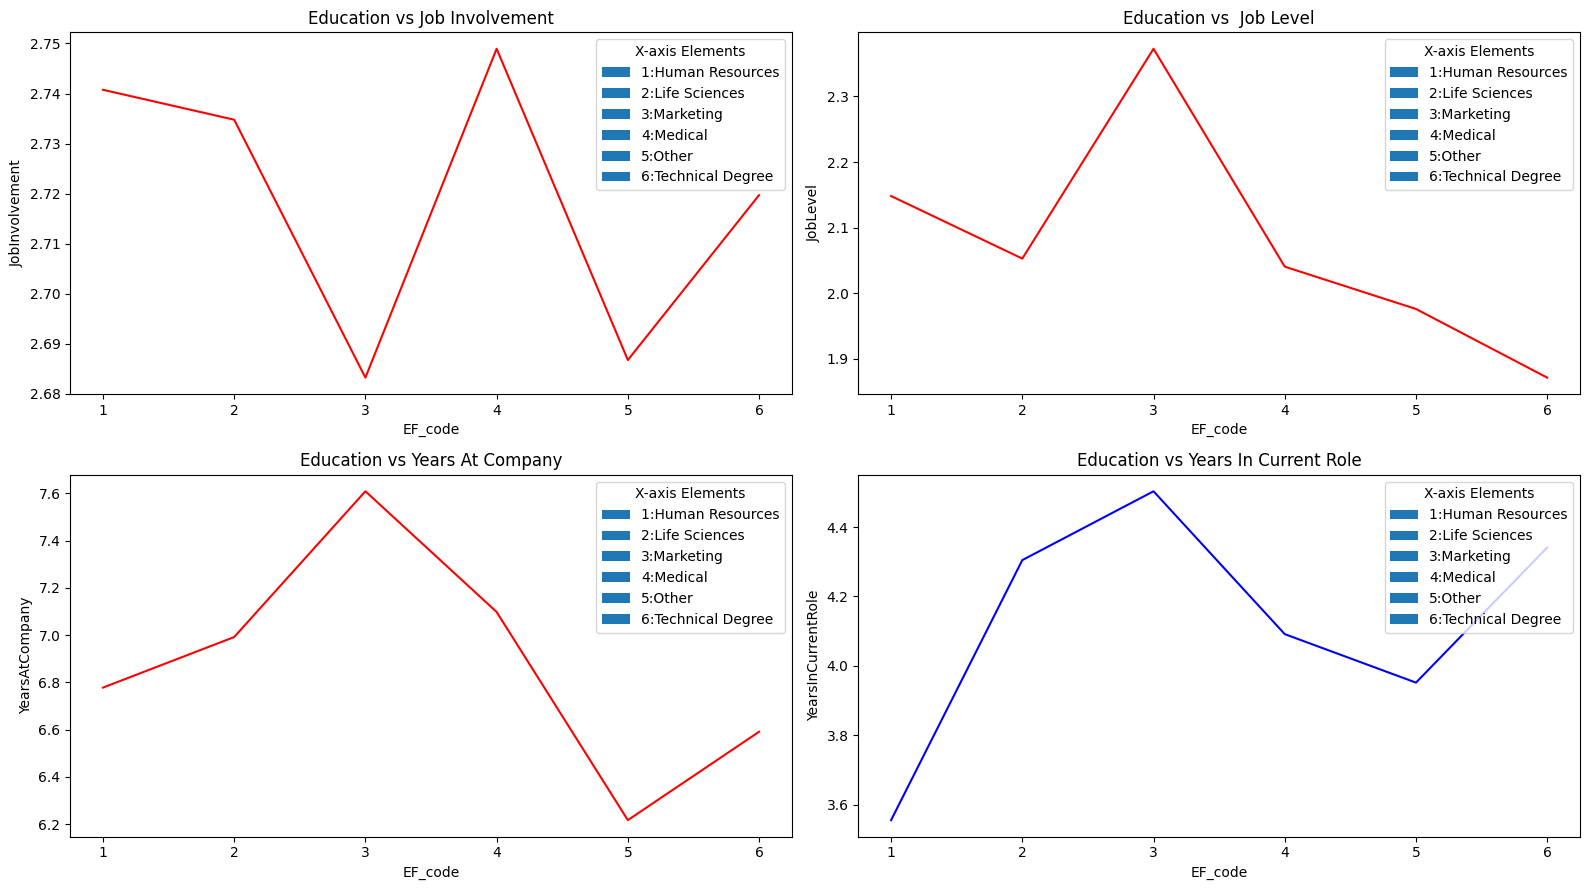

In [ ]:
fig, axs= plt.subplots(2,2, figsize=(16,9))
legend_elements = [mpatches.Patch(label='1:Human Resources'),
                   mpatches.Patch(label='2:Life Sciences'),
                   mpatches.Patch(label='3:Marketing'),
                   mpatches.Patch(label='4:Medical'),
                   mpatches.Patch(label='5:Other'),
                   mpatches.Patch(label='6:Technical Degree')]

sns.lineplot(x='EF_code',y='JobInvolvement', data=fdata, ci=None, color='red' ,ax=axs[0,0])
axs[0,0].set_title(label="Education vs Job Involvement")
axs[0,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='EF_code',y='JobLevel', data=fdata, color='red',ci=None, ax=axs[0,1])
axs[0,1].set_title(label= "Education vs  Job Level")
axs[0,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='EF_code',y='YearsAtCompany', data=fdata, color='red' ,ci=None, ax=axs[1,0])
axs[1,0].set_title(label="Education vs Years At Company")
axs[1,0].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

sns.lineplot(x='EF_code',y='YearsInCurrentRole', data=fdata, color='blue',ci=None, ax=axs[1,1])
axs[1,1].set_title(label= "Education vs Years In Current Role")
axs[1,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')

plt.tight_layout()
plt.savefig("PIC_17")

plt.show()


<ipython-input-77-32f3f899acff>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='EF_code',y='MonthlyIncome', data=fdata, ci=None,color='blue', ax=axs[0,0])


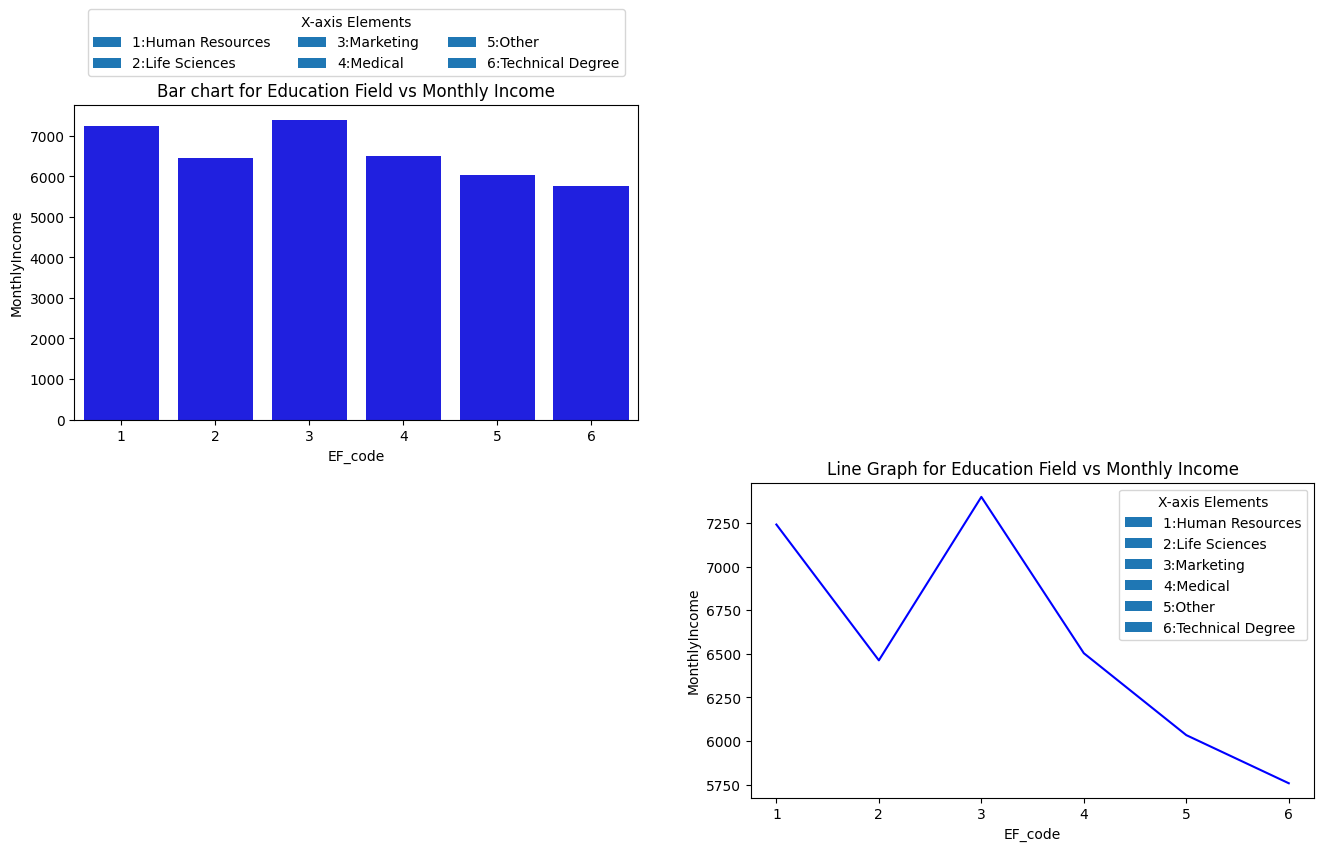

In [ ]:
#EF_code vs MonthlyIncome

fig, axs= plt.subplots(2,2, figsize=(16,9))
legend_elements = [mpatches.Patch(label='1:Human Resources'),
                   mpatches.Patch(label='2:Life Sciences'),
                   mpatches.Patch(label='3:Marketing'),
                   mpatches.Patch(label='4:Medical'),
                   mpatches.Patch(label='5:Other'),
                   mpatches.Patch(label='6:Technical Degree')]

sns.barplot( x='EF_code',y='MonthlyIncome', data=fdata, ci=None,color='blue', ax=axs[0,0])
axs[0,0].set_title(label="Bar chart for Education Field vs Monthly Income")
axs[0,0].legend(handles=legend_elements, title='X-axis Elements',bbox_to_anchor=(0.5, 1.09), loc='lower center', borderaxespad=0., ncol=3)

axs[1,0].remove()
axs[0,1].remove()
sns.lineplot(x='EF_code', y='MonthlyIncome', data=fdata, errorbar=None, color='blue', ax=axs[1,1])
axs[1,1].set_title(label= "Line Graph for Education Field vs Monthly Income")
axs[1,1].legend(handles=legend_elements, title='X-axis Elements', loc='upper right')
plt.savefig("PIC_18")

plt.show()